In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
dataFrame = pd.read_csv("Wine.csv")
dataFrame.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [49]:
dataFrame.shape

(178, 14)

In [50]:
#Se determina las variables a evaluar
X = data_escalada
### DATOS DE MUESTRA ###
#Se selecionan unos datos al azar para posteriormente verificar el clúster 
#al que pertenecen
indices = [10, 90, 150]
muestras = pd.DataFrame(dataFrame.loc[indices], 
                       columns = dataFrame.keys()).reset_index(drop = True)

data = dataFrame.drop(indices, axis = 0)

In [51]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(dataFrame[["Malic_Acid","Ash_Alcanity","Nonflavanoid_Phenols"]])
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [52]:
X = data_escalada
y = np.array(dataFrame['Customer_Segment'])

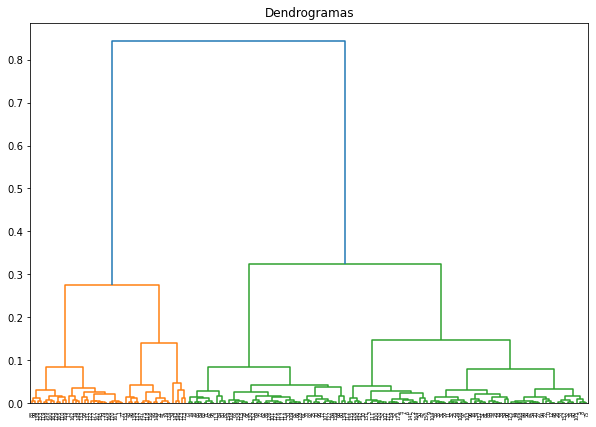

In [53]:
#Se gráfica el dendrograma para obtener el número de clúster
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogramas") 
dendrograma = shc.dendrogram(shc.linkage(X, method = 'ward'))

In [54]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([3, 1, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 1, 1, 3, 3, 2, 3, 0, 3, 0,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 0, 4, 0,
       3, 0, 0, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 1, 3, 2, 3, 3, 2, 1, 4, 2, 4, 3, 3, 3, 3, 2, 2, 2,
       1, 4, 4, 2, 2, 2, 2, 2, 0, 1, 4, 2, 1, 0, 0, 3, 2, 2, 2, 1, 2, 1,
       3, 1, 2, 4, 0, 0, 1, 4, 4, 4, 4, 0, 0, 1, 0, 0, 1, 1, 4, 4, 2, 1,
       2, 0, 0, 3, 2, 2, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 4, 4, 0, 1, 0,
       4, 1])

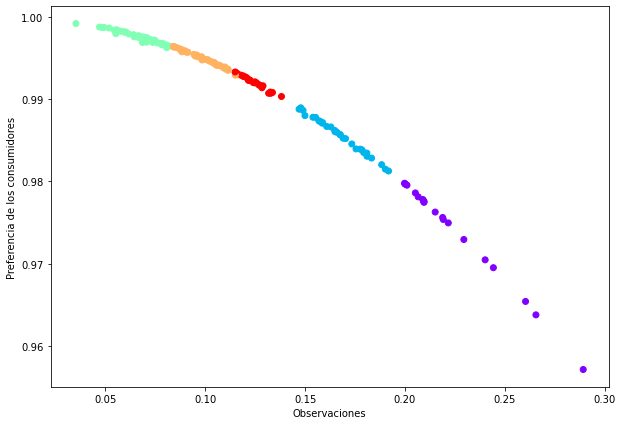

In [55]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1], c=cluster.labels_,cmap='rainbow')
plt.xlabel("Observaciones")
plt.ylabel("Preferencia de los consumidores")
plt.show()